Bliss Point Media Interview Deck 

In [11]:
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [12]:
df_15 = pd.read_csv("./DataSet_WorldHappiness/2015.csv")
df_16 = pd.read_csv("./DataSet_WorldHappiness/2016.csv")
df_17 = pd.read_csv("./DataSet_WorldHappiness/2017.csv")

In [91]:
h_cols = ['Country', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Load 2015, 2016, 2017 data into one combined file 
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    df = df[['Happiness Score'] + [x for x in df if x not in ['Happiness Score'
    ]]]
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_15, 2015)
df = df.append(prep_frame(df_16, 2016), sort=False)
df = df.append(prep_frame(df_17, 2017), sort=False)

In [105]:
df['Happiness Score']





Country                   Year
Switzerland               2015    7.587
Iceland                   2015    7.561
Denmark                   2015    7.527
Norway                    2015    7.522
Canada                    2015    7.427
                                  ...  
Rwanda                    2017    3.471
Syria                     2017    3.462
Tanzania                  2017    3.349
Burundi                   2017    2.905
Central African Republic  2017    2.693
Name: Happiness Score, Length: 470, dtype: float64

In [93]:
spearman_cormatrix = df.corr(method='spearman')

<AxesSubplot:>

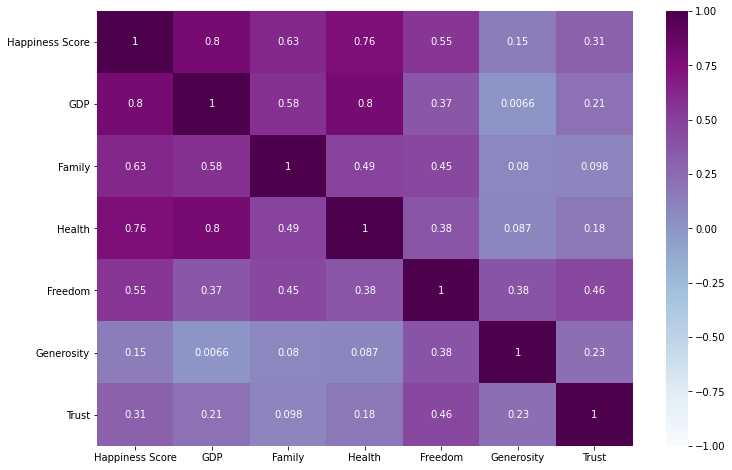

In [94]:
fig = plt.figure(figsize = (12,8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1,
            center=0, cmap="BuPu", annot=True)

In [243]:
wm = pd.read_csv('./DataSet_WorldHappiness/WM.csv')

In [245]:

data = dict(type = 'choropleth', locations = wm['Country'], locationmode = 'country names', z = wm['Average Happiness Score'], text = 
           '2017:' + wm['Happiness Score 2017'].astype(str) + '<br>' + \
            '2016:' + wm['Happiness Score 2016'].astype(str) + '<br>' + \
            '2015:' + wm['Happiness Score 2015'].astype(str), hoverinfo = 'text+location',colorscale='Greens', autocolorscale=False, reversescale=True, 
            marker_line_color = 'darkgray', marker_line_width = 0.5, colorbar = {'title':'Average Happiness Score (2015 - 2017)', 'len' : 0.65, 'ypad':20})
layout = dict(title = 'Happiness Index 2015 - 2017', geo = dict(showframe = False, projection = {'type' : 'mercator'}), autosize=False, width=1000, height = 750)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)










# Use Seaborn to Make Scatter Plots 

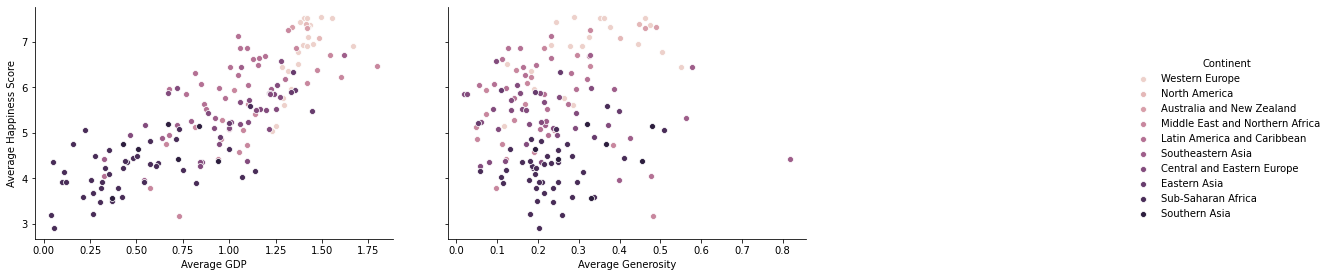

In [236]:
happiness_plts = sns.pairplot(wm, hue='Continent', palette=sns.cubehelix_palette(10), 
                             x_vars = ['Average GDP', 'Average Generosity'], 
                             y_vars ='Average Happiness Score')
happiness_plts.fig.set_size_inches(20, 4)

